**Monte Carlo sampling  by Invertion Method**

\\

**Example 1:** Sampling the Exponential distribution 


\\


The exponential PDF is defined as 

\begin{equation*}
f(t) =
\begin{cases}
 \frac{1}{\tau}e^{-t/\tau} ~~~\text{, if } ~ t\geq 0 \\
 0~~~\text{, if } ~ t<0 
\end{cases}
\end{equation*}


For this distribution the  CDF is given by 

\begin{equation*}
F(t) = \int_{0}^t \frac{1}{\tau}e^{-t'/\tau} dt' = 1 - e^{-t/\tau} 
\end{equation*}

As we know, the inverse of the CDF function $F^{-1}(u)$ leads to a uniform random variable. So, inverting $u=F(t)$ we get

\begin{equation*}
u = 1 - e^{-t/\tau} ~~~ \Rightarrow ~~~ \boxed{ t = -\tau \ln{(1-u)} }
\end{equation*}

\\

\\

Plot of the sampling of the exponential distribution as a histogram 

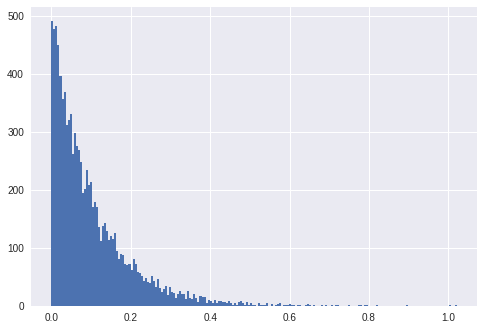

In [0]:
# MC Sampling an Exponential distribution by Invertion Method
from numpy.random import random
from numpy import log
import matplotlib.pyplot as plt
# number of points
np=10000
# number of histogram bins
nbins=200
# Mean lifetime
tau=0.1
# Inverse CDF function
def invCDF(u):
   return -tau*log(1-u)
# sample inverse CDF using a uniform distribution 
sample = [invCDF(random()) for _ in range(np)]
# plot the distribution of sample means
plt.hist(sample,nbins)
plt.show()


Plot of the sampling normalized histogram overlaid with Exponential PDF

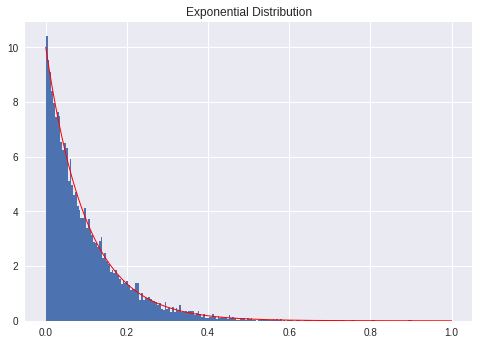

In [0]:
# MC Sampling an Exponential distribution by Invertion Method
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
# number of points
npts=10000
# number of histogram bins
nbins = 200
# Mean lifetime
tau=0.1
# Inverse CDF function
def invCDF(u):
   return -tau*np.log(u)
# sample inverse CDF using a uniform distribution 
sample = [invCDF(random()) for _ in range(npts)]
# create a figure containing overlaid subplots (Histogram and Exponential)
fig, ax = plt.subplots()
ax.set_title('Exponential Distribution')
# create a histogram with sampled data
ax.hist(sample,nbins,density=1)
# create a plot of the exponential distribution
x = np.linspace(0,1,1000)
y = (1/tau)*np.exp(-x/tau)
ax.plot(x,y,color='red',linewidth=1)
# show plot
plt.show()


\\

**Example 2:** Sampling the Breit-Wigner distribution 

\\

The Breit-Wigner PDF is defined as 

\begin{equation*}
f(x) =\frac{2}{\pi}\frac{\Gamma}{4(x-a)^2+\Gamma^2} 
\end{equation*}


For this distribution the  CDF is given by 

\begin{equation*}
F(x) = \frac{2}{\pi \Gamma} \int_{-\infty}^x \frac{\Gamma^2}{4(x'-a)^2+\Gamma^2} dx' 
\end{equation*}

To integrate we make the  change of variables $y=2(x-a)/\Gamma ~\Rightarrow ~ du=(2/\Gamma)dy$ , obtaining

\begin{align*}
F(x) &= \frac{1}{\pi} \int_{-\infty}^{2(x-a)/\Gamma } \frac{1}{y^2+1} dy = \frac{1}{\pi} \arctan{(y)}~\bigg|_{y=-\infty}^{y=2(x-a)/\Gamma} \\
       &= \frac{ \arctan{\left( 2(x-a)/\Gamma \right)} }{\pi} +\frac{1}{2}
\end{align*}



Inverting the CDF $u=F(x)$ , we get

\begin{align*}
F^{-1}(u) &= a+ \frac{\Gamma}{2}  \tan{\left[ \pi \left( u - \frac{1}{2} \right) \right]} 
\end{align*}


\\

\\

Plot of the sampling normalized histogram overlaid with Breit-Wigner PDF

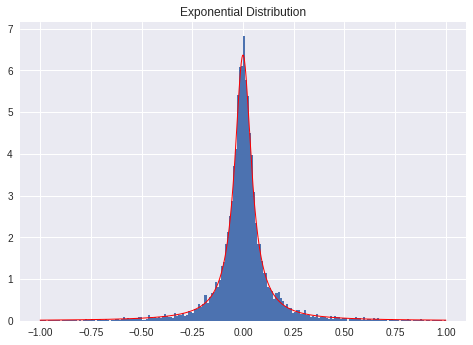

In [0]:
# MC Sampling an Exponential distribution by Invertion Method
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
# number of points
npts=10000
# number of histogram bins
nbins=200
# Breit-Wifner width and pole
gamma=0.1
a=0
# Inverse CDF function
def invCDF(u):
   return ( a+0.5*gamma*np.tan( np.pi*(u-0.5) ) )
# sample inverse CDF using a uniform distribution 
sample = [invCDF(random()) for _ in range(npts)]
# create a figure containing overlaid subplots (Histogram and Exponential)
fig, ax = plt.subplots()
ax.set_title('Breit-Wigner Distribution')
# create a histogram with sampled data
xmin=a-10*gamma
xmax=a+10*gamma
ax.hist(sample,nbins,range=[xmin,xmax],density=1)
# create a plot of the Breit-Wigner distribution
x = np.linspace(xmin,xmax,1000)
y = 2/np.pi * gamma/( 4*(x-a)**2 + gamma**2 ) 
ax.plot(x,y,color='red',linewidth=1)
# show plot
plt.show()



\\

**Monte Carlo Sampling by Acceptance-Rejection Method** 

\\

**Example 1:** Sampling of a Gaussian (Normal) distribution 


\\


The gaussian PDF is defined as 

\begin{equation*}
f(x) = \frac{1}{ \sqrt{2\pi} \sigma } e^{-\frac{x^2}{2\sigma^2} }
\end{equation*}


\\

This function has a CDF that is not expressed in terms of elementary function and it's very hard to find its inverse. But it's easy to sample it using acceptance-rejection method.  

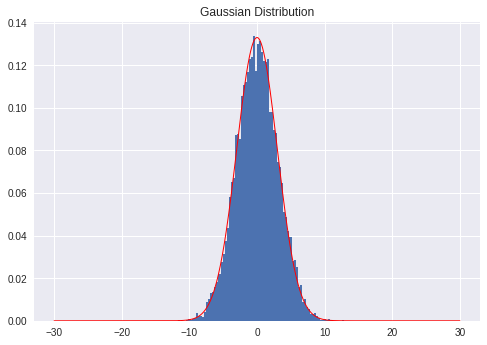

Sampling Efficiency= 12 %


In [0]:
# MC Sampling of a Gaussian distribution by Acceptance-Rejection Method
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
# number of points
npts=10000
# number of histogram bins
nbins=200
# Gaussian width and mean
sigma=3.0
mean=0
# Gaussian function definition
def gaussian(u):
   return  1/(( 2*np.pi )**0.5*sigma)*np.exp( -(u-mean)**2/(2*sigma**2) ) 
# Sampling range
xmin=mean-10*sigma
xmax=mean+10*sigma
ymax=gaussian(mean)
# Accept or Reject the points
sample=[]
naccept=0
ntot=0
while naccept<npts:  
  ntot+=1
  x=np.random.uniform(xmin,xmax) # x'  
  y=np.random.uniform(0,ymax) # y'    
  if y<gaussian(x):  
   sample.append(x)  
   naccept+=1
# Create a numpy array with the list of selected points
sample=np.array(sample)     
# create a figure containing overlaid subplots (Histogram and Exponential)
fig, ax = plt.subplots()
ax.set_title('Gaussian Distribution')
# create a histogram with sampled data
ax.hist(sample,nbins,range=[xmin,xmax],density=1)
# create a plot of the exponential distribution
x = np.linspace(xmin,xmax,1000)
y = gaussian(x)
ax.plot(x,y,color='red',linewidth=1)
# show plot
plt.show()
print("Sampling Efficiency=",int(naccept/ntot*100),"%")


\\

**Monte Carlo Importance Sampling**



Problem 1: How to use Importance Sampling to improve the Gaussian sampling efficiency ?

